In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [166]:
batch_size = 6     #How many images in one batch
# Downloading the Datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#Trainloader 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified


In [215]:
classesC = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

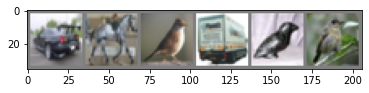

car   horse bird  truck bird  bird 


In [170]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))        #Doenst work otherwise
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 3, 32, 32)


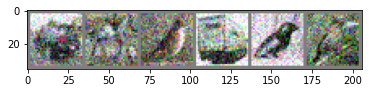

car    horse  bird   truck  bird   bird  


In [216]:
imagesnp = images.numpy()
imagesnpC = imagesnp.copy()  
print(imagesnpC.shape)

dataCNoisy = add_noise(imagesnpC)
dataCNoisy = torch.from_numpy(dataCNoisy)

#show images
imshow(torchvision.utils.make_grid(dataCNoisy))

#print labels
print(' '.join(f'{classesC[labels[j]]:6s}' for j in range(batch_size)))

In [171]:
#Decompozing
trainloader

In [172]:
im, la =  dataiter.next()

In [173]:
im.size()

torch.Size([6, 3, 32, 32])

In [174]:
la

tensor([4, 6, 5, 9, 0, 4])

In [175]:
im = im/2 + 0.5  #0.25 for some clipping
im = torchvision.utils.make_grid(im)

deer  frog  dog   truck plane deer 


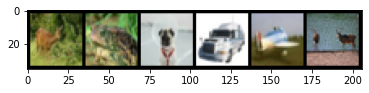

In [176]:
npim = im.numpy()
plt.imshow(np.transpose(npim, (1, 2, 0)))
print(' '.join(f'{classes[la[j]]:5s}' for j in range(batch_size)))

In [177]:
from torchvision.transforms import ToTensor

In [178]:
#Donwload MNIST
trainSetMnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())

In [179]:
trainloaderMnist = torch.utils.data.DataLoader(trainSetMnist, batch_size=batch_size, shuffle=True, num_workers=2)
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

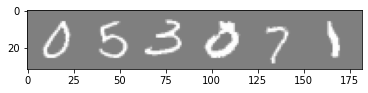

0        5        3        0        7        1       


In [180]:
# get some random training images
dataiterM = iter(trainloaderMnist)
imagesM, labelsM = dataiterM.next()

# show images
imshow(torchvision.utils.make_grid(imagesM))
# print labels
print(' '.join(f'{classes[labelsM[j]]:8s}' for j in range(batch_size)))

In [181]:
imagesM.size()

torch.Size([6, 1, 28, 28])

In [182]:
example1 = imagesM[0][0]

In [183]:
example1.size()

torch.Size([28, 28])

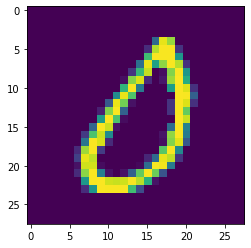

In [184]:
plt.imshow(example1)

In [185]:
ex1list = example1.tolist()

(-0.5, 27.5, 27.5, -0.5)

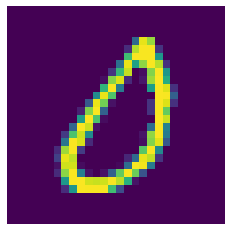

In [186]:
plt.imshow(ex1list)
plt.axis('off')

In [187]:
# 5000 MNIST pictures of size 28 x 28 take 4 MB of space. CIFAR10 15MB. SVHN also.
#Lets look at the SVH database
trainSetSVHN = torchvision.datasets.SVHN(root='./data', download=True, transform=ToTensor())

Using downloaded and verified file: ./data/train_32x32.mat


In [188]:
from torch.utils.data import random_split
val_size = 12000
train_size = len(trainSetSVHN) - val_size

train_ds, val_ds = random_split(trainSetSVHN, [train_size, val_size])
len(train_ds), len(val_ds)

(61257, 12000)

In [189]:
trainLoaderSvhn = torch.utils.data.DataLoader(train_ds, batch_size = 12, shuffle=True, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([12, 3, 32, 32])


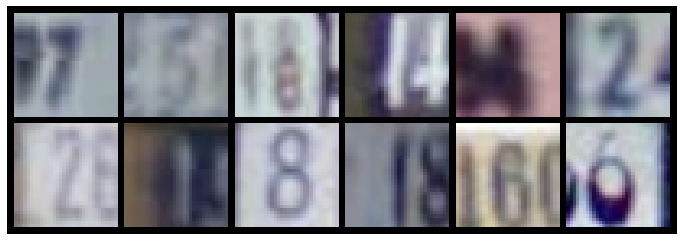

In [190]:
for ima, _ in trainLoaderSvhn:
    print('images.shape:', ima.shape)
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(torchvision.utils.make_grid(ima, nrow=6).permute((1, 2, 0)))
    break

In [191]:
#Lets look at the ImageNet database
#trainSetImageNet = torchvision.datasets.ImageNet(root='./data', download=True, transform=ToTensor())

In [207]:
#Lets create some Gaussian noise

def add_noise(data, mu=0, sigma=0.3):
    nbB = data.shape[0] * data.shape[1] * data.shape[2] * data.shape[3]
    s = np.random.normal(mu, sigma, nbB)
    test = 0
    a = 0
    for i in range(0, data.shape[0]): # for every image
        for j in range(0, data.shape[1]): # for every channel
            channel = np.double(data[i,j])
            for k in range(0, data.shape[2]):
              for l in range(0, data.shape[3]):
                #print(data[i,j,k,l])
                data[i,j,k,l] = channel[k,l] + s[a]
                a = a + 1        # channel = si.util.random_noise(channel,  mode='gaussian')
                #print(data[i,j,k,l])
                #print("XXXXXXXXX")
    #print(s)
    return data

In [208]:
#Taking a image batch, convering to numpy, copy, crete new noisy numpy, back to tensor conversion.
imagesMnp = imagesM.numpy()
imagesMnpC = imagesMnp.copy()  
print(imagesMnpC.shape)

dataMNoisy = add_noise(imagesMnpC)
dataMNoisy = torch.from_numpy(dataMNoisy)

(6, 1, 28, 28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


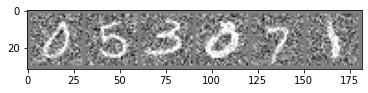

0      5      3      0      7      1     


In [211]:
#show images
imshow(torchvision.utils.make_grid(dataMNoisy))
#print labels
print(' '.join(f'{classes[labelsM[j]]:6s}' for j in range(batch_size)))